<a href="https://colab.research.google.com/github/NikosKats/ColabFiles/blob/CIFAR10-LOAD-TRAIN-TEST.ipynb/CIFAR10_LOAD_TRAIN_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. The classes are mutually exclusive and there is no overlap between them. The dataset is divided into five training batches and one test batch, each with 10,000 images. The test batch contains exactly 1,000 randomly-selected images from each class. The training batches contain the remaining images in random order.

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

The code provided loads the CIFAR-10 dataset using the torchvision.datasets module and applies some data augmentation techniques such as random cropping and random horizontal flipping to the images. Then it use the torch.utils.data.DataLoader to create a DataLoader object which makes it easier to iterate through the dataset and feed the data to the model.

In [14]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [32]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


Visualise the images

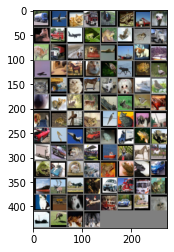

truck plane   cat truck
truck plane   cat truck


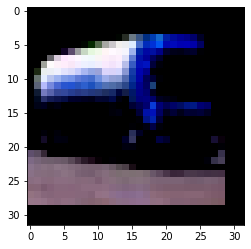

In [34]:
import matplotlib.pyplot as plt

# Get some random training images
images, labels = next(iter(trainloader))

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

plt.imshow(np.transpose(images[0], (1, 2, 0)))
plt.show()


Once the dataset is loaded, you can experiment with different models to classify the images. A popular choice for image classification tasks is convolutional neural networks (CNNs). PyTorch has a built-in module torch.nn for building neural networks. You can easily create a CNN model by defining a custom class that inherits from torch.nn.Module and implementing the forward method. Here's an example of a simple CNN model for CIFAR-10 classification:

In [35]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


The CNN model defined as Net class, consists of a series of layers, specifically convolutional layers, pooling layers, and fully connected layers.

---

The nn.Conv2d layers are convolutional layers that are responsible for detecting patterns in the input images. 


* The first argument to nn.Conv2d is the number of input channels, in this case 3 for R, G, and B color channels. 

* The second argument is the number of output channels, also known as the number of filters. 

* The third argument is the kernel size, which is the size of the filters.

---
The nn.MaxPool2d layers are pooling layers that are responsible for reducing the spatial dimensions of the input images. 

* This layer is used to reduce the size of the image and also to reduce the number of parameters in the model.

---

The nn.Linear layers are fully connected layers that are responsible for mapping the high-level features extracted by the convolutional layers to the output classes. 

* The first argument to nn.Linear is the number of input features and the second argument is the number of output features.

---

The forward method takes an input tensor, applies a series of operations defined by the layers in the model, and returns an output tensor. 

In this case, the output tensor will have the same batch size as the input tensor, but with 10 features, one for each class.

In [36]:
""" 
  This line of code creates an optimizer object 
  using the SGD algorithm. The first argument passed 
  to the optimizer is the model's parameters. 
  The `lr` (learning rate) argument is used to control the step size of the optimization process. 
  A smaller learning rate results in smaller steps and a larger learning rate results in larger steps. 
  The `momentum` parameter is used to smooth out the gradients and prevent oscillations.
"""
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

"""
Adam optimizer is a combination of RMSprop and Stochastic Gradient Descent with momentum. 
It uses the squared gradients to scale the learning rate like RMSprop, 
and it takes advantage of momentum by using moving averages of the parameters like SGD with momentum.
"""
# optimizer = torch.optim.Adam(net.parameters(), lr=0.001)



'\nAdam optimizer is a combination of RMSprop and Stochastic Gradient Descent with momentum. \nIt uses the squared gradients to scale the learning rate like RMSprop, \nand it takes advantage of momentum by using moving averages of the parameters like SGD with momentum.\n'

The last step is to define the loss function and optimizer. The nn.CrossEntropyLoss is commonly used as the loss function for multi-class classification problems. The optimizer used is optim.SGD which is the stochastic gradient descent optimizer, this optimizer will update the model's parameters based on the gradients computed during the backward pass.

After defining the model, loss function, and optimizer, the model can be trained using the trainloader and testloader to iterate through the dataset, passing the images and labels to the model, computing the loss, and updating the model's parameters.

Once the model is trained, you can measure its classification accuracy on the test set using the following steps:

Set the model in evaluation mode: net.eval()
Iterate through the test set using the testloader:


In [37]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


In [38]:
accuracy = 100 * correct / total
print('Accuracy of the network on the test images: %d %%' % accuracy)


Accuracy of the network on the test images: 10 %


In [39]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Convert labels from tensor to numpy
labels = labels.numpy()
predicted = predicted.numpy()

# Plot confusion matrix
conf_mat = confusion_matrix(labels, predicted)


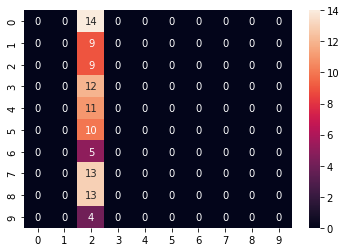

In [40]:
import seaborn as sns
sns.heatmap(conf_mat, annot=True)
